In [6]:
!pip install snscrape
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install textblob
!pip insatall re
!pip install pandas
!pip install emot
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 7.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "insatall" - maybe you meant "install"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 7.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sia
from textblob import TextBlob
import re

In [2]:
import nltk
nltk.download('stopwords') #run once 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

from emot.emo_unicode import UNICODE_EMOJI

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# not quite useful atleast in election oriented

# count_hash = {}
# count_at = {}

# def count_tags(tweet_text):
#     hash_tag = re.findall(r"#(\w+)", tweet_text)
#     at_tag = re.findall(r"@(\w+)", tweet_text)
    
#     if(len(hash_tag)!=0):
#         for i in hash_tag: 
#             if i not in count_hash.keys():
#                 count_hash[i] = 1
#             else:
#                 count_hash[i] += 1    
        
#         for i in at_tag: 
#             if i not in count_at.keys():
#                 count_at[i] = 1
#             else:
#                 count_at[i] += 1   

In [ ]:
#change
query = "Joe Biden lang:en"

tweets_with_loc = []

tweets = []

fr = open("rejected_tweets_analysis.txt", "a")

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):   
    if i>20000:
        break

    else:
        if(len(tweet.content.split()) >= 10): #why 10
            if str(tweet.user.location) != "" :
                tweets_with_loc.append(str(tweet.user.location))
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])
            # count_tags(tweet.content)
        else:
            # pass
            fr.write(tweet.content + " " + str(len(tweet.content.split())) + "\n")
            # print(tweet.content, len(tweet.content.split()))

# print(tweets_with_loc) # 500 me se 284; with correct locations


In [25]:
# number_of_tweets = len(tweets)
# df = pd.DataFrame(tweets, columns = ['date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
# df.to_csv('sentiment.csv')


df = pd.read_csv('/content/drive/MyDrive/dsci_project/tweets_donald_trump.csv')
number_of_tweets = len(df) + 1

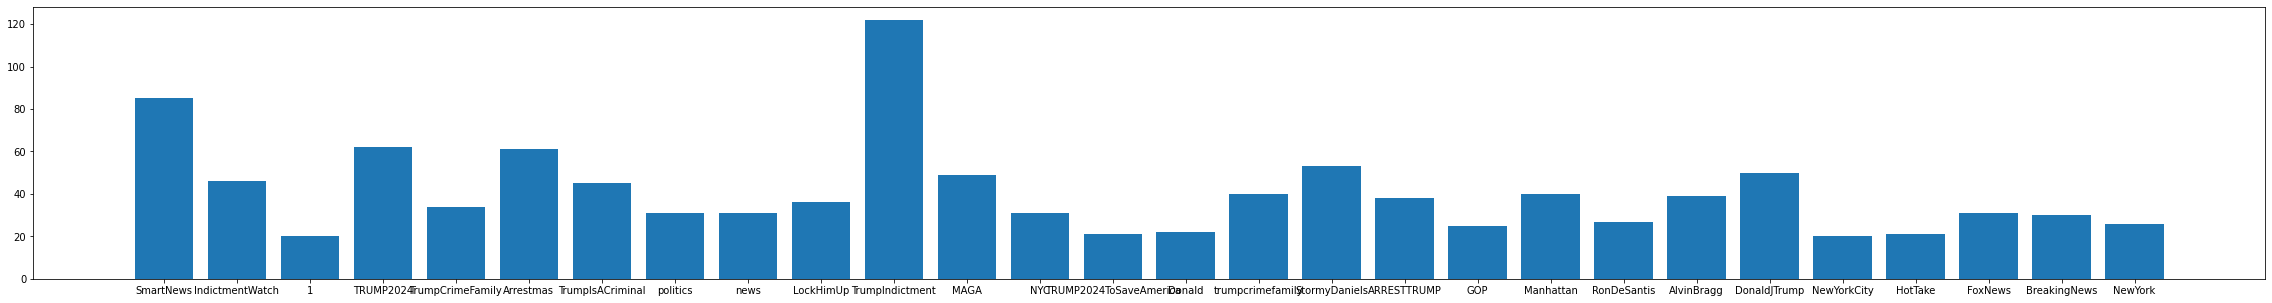

In [16]:
hashtags = {}
# mentions = {}

def count_tags(tweet_text):
    hashtag = re.findall(r"#(\w+)", tweet_text)
    # mentions = re.findall(r"@(\w+)", tweet_text)
    
    if(len(hashtag)!=0):
        for i in hashtag: 
            if i not in hashtags.keys():
                hashtags[i] = 1
            else:
                hashtags[i] += 1    
        
        # for i in mention: 
        #     if i not in mentions.keys():
        #         mentions[i] = 1
        #     else:
        #         mentions[i] += 1   

df['tweet'].apply(count_tags)
# print(count_mentions)
# print()
# print(hashtags)

hashtagslist = list(hashtags.keys())

for key in hashtagslist:
    if (hashtags[key] < 0.001 * number_of_tweets) or (hashtags[key] > 0.01 * number_of_tweets):
        del hashtags[key]

hashtagslist = list(hashtags.keys())
frequencies = list(hashtags.values())

plt.bar(range(len(hashtagslist)), frequencies, tick_label=hashtagslist)
plt.rcParams['figure.figsize'] = [40, 5]
plt.show()

In [18]:
eng_stop_words = list(stopwords.words('english'))
# emoji = list(UNICODE_EMOJI.keys())

In [34]:
def filtering(text):
    text = text.lower()

    #mentions, hashtags, any character except, urls?
    # text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    
    # hahtags remove?
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())

    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    # filtered_words = [w for w in filtered_words if w not in emoji]

    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)

    return text

#test
# filtering("@kvenkat1680 @SecularFringe @GemsOfBollywood Those will loss Who were faking despite of political alignments. As per Hindenberg, Adani manipulated &; used a fake assets scene and https://www.sdhvb.com he is getting rewards for his deeds, no surprise. As per your views the super hit movies are unable to stay on screen for more than two weeks. #Truth")


df['filtered_tweets'] = df['tweet'].apply(filtering)

In [20]:
polar = 0
pnn = [0, 0, 0]

# def polarity(tweet):
#     global polar, pos, neu, neg
#     curr_pol = TextBlob(tweet).sentiment.polarity
    
#     if curr_pol > 0 : pnn[0] += 1
#     elif curr_pol == 0 : pnn[1] += 1
#     else : pnn[2] += 1

#     polar += curr_pol
#     return curr_pol

# df['polarity'] = df['filtered_tweets'].apply(polarity)
# df.head(20)

def vader_polarity(text):
    score = sia().polarity_scores(text)
    compound_score = score['compound']

    global polar, pos, neu, neg
    # curr_pol = TextBlob(tweet).sentiment.polarity
    
    if compound_score > 0 : pnn[0] += 1
    elif compound_score == 0 : pnn[1] += 1
    else : pnn[2] += 1

    polar += compound_score
    return compound_score

df['polarity'] = df['filtered_tweets'].apply(vader_polarity)

In [32]:
df.to_csv('sentiment.csv', mode = 'w')

# df = pd.read_csv('sentiment.csv')

In [ ]:
# print("sentiment polarity : ", polar*100 / len(tweets))
print("positive tweets :", pnn[0]*100 / number_of_tweets, "%")
print("neutral tweets :", pnn[1]*100 / number_of_tweets, "%")
print("negative tweets :", pnn[2]*100 / number_of_tweets, "%")

<BarContainer object of 3 artists>

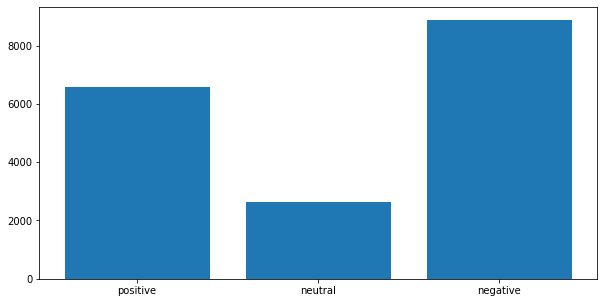

In [29]:
# graphs 
# positive neutral and negative tweets for trump vs biden
# location
# common words
# no. of positive and negative tweets over a period

x_axis = ["positive", "neutral", "negative"]

plt.rcParams['figure.figsize'] = [10, 5]
plt.bar(x_axis, pnn)


In [ ]:
#problem

tweets_string = df['filtered_tweets'].tolist()
tweets_string = " ".join(tweets_string)

tweets_string = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweets_string).split())

tweets_list = tweets_string.split()

#change
words_not_to_include = ["donald", "trump"]

tweets_list = [i for i in tweets_list if (i not in words_not_to_include and len(i)>2)]

tweets_string = " ".join(tweets_list)

# print+(tweets_string)

w_cloud = WordCloud(collocations = False, max_words=200, background_color = 'white', width = 14000, height = 10000).generate(tweets_string)
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()